# Predicting Diabetes with Logistic Regression

### We’ll be using Machine Learning to predict whether a person has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc. 

- We will import pandas to read our data from a CSV file and manipulate it for further use. 
- We will use numpy to convert out data into a format suitable to feed our classification model. 
- We’ll use seaborn and matplotlib for visualizations.
- We will then import Logistic Regression algorithm from sklearn. This algorithm will help us build our classification model.

In [11]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [23]:
a = np.array([[1, 2], [3, 4]])
print(a)
#np.mean(a, axis=0)
np.mean(a, axis=1)


[[1 2]
 [3 4]]


array([1.5, 3.5])

## Dataset information:

- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
Several constraints were placed on the selection of these instances from a larger database. 
In particular, all patients here are females at least 21 years old of Pima Indian heritage.


- Pregnancies: Number of times pregnant

- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

- BloodPressure: Diastolic blood pressure (mm Hg)

- SkinThickness: Triceps skin fold thickness (mm)

- Insulin: 2-Hour serum insulin (mu U/ml)

- BMI: Body mass index (weight in kg/(height in m)^2)

- DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

- Age: Age (years)

- Outcome: Class variable (0 or 1)



### Is our data is clean (has no null values, etc)?

In [12]:
diabetesDF = pd.read_csv('assets/diabetes.csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### The data does have some missing values (see Insulin = 0) in the samples in the previous figure. Ideally we could replace these 0 values with the mean value (impute) for that feature, but we’ll skip that for now.

## Data Exploration

Let us now explore our data set to get a feel of what it looks like and get some insights about it.
Let’s start by finding correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap.  In the heatmap, brighter colors indicate more correlation.

In [6]:
corr = diabetesDF.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Glucose levels, age, BMI and number of pregnancies all have significant correlation with the outcome variable

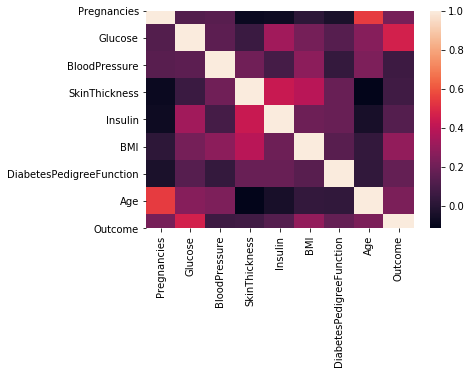

In [7]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Let’s also look at how many people in the dataset are diabetic and how many are not.

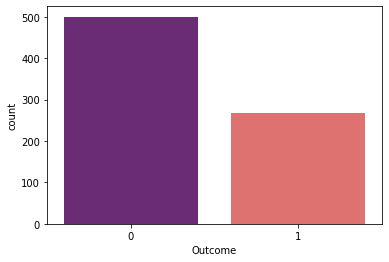

In [8]:
sns.countplot(x = 'Outcome', data = diabetesDF, palette = 'magma')

It is also helpful to visualize relations between a single variable and the outcome. Below, we’ll see the relation between age and outcome.

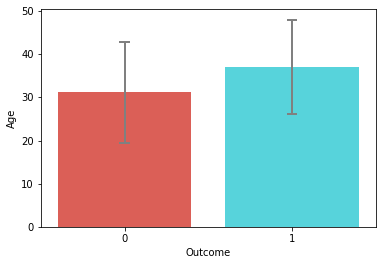

In [9]:
sns.barplot(x = 'Outcome', y = 'Age',  data = diabetesDF,
            palette = 'hls',
            order = [0, 1],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

## Dataset Preparation (splitting and normalization)

When using machine learning algorithms we should always split our data into a training set and test set. We will also separate out some data for manual cross checking.

The data set consists of record of 768 patients in total. To train our model we will be using 650 records. We will be using 100 records for testing, and the last 18 records to cross check our model.

In [13]:
#Total 768 patients record
#Using 650 data for training
# Using 100 data for testing
#Using 18 data for checking
insulin_nonzero_mean = diabetesDF['Insulin'].replace(0,np.nan).mean(skipna=True)
diabetesDF['Insulin'] = diabetesDF['Insulin'].replace(0, insulin_nonzero_mean)

dfTrain = diabetesDF[:650]
dfTest = diabetesDF[650:750]
dfCheck = diabetesDF[750:]

Next, we separate the label and features (for both training and test dataset). In addition to that, we will also convert them into NumPy arrays as our machine learning algorithm process data in NumPy array format.

In [14]:
#Separating label and features and converting to numpy array to feed into our model
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))


### Data Normalization

As the final step before using machine learning, we will normalize our inputs. Machine Learning models often benefit substantially from input normalization. It also makes it easier for us to understand the importance of each feature later, when we’ll be looking at the model weights. We’ll normalize the data such that each variable has 0 mean and standard deviation of 1.

In [20]:
# Normalize the data 
means = np.mean(trainData, axis=1)
stds = np.std(trainData, axis=1)
print(means)
print(stds)


trainData = (trainData - means)/stds
testData = (testData - means)/stds

#means = np.mean(trainData, axis=0)
#stds = np.std(trainData, axis=0)
#print(means)
#print(stds)
# stds = np.std(trainData, axis=0)

[ 0.59238985 -0.33929766  0.13699142 -0.61136459  0.72080845 -0.32843836
 -0.49015953 -0.49957202  1.0706863  -0.17919659 -0.08718555  0.42243051
  0.75529892  1.3524595   0.39975255 -0.59232963  0.49343568 -0.19495772
 -0.30946112 -0.07303976  0.53216475  0.22040879  0.59295955  0.21070506
  0.79108823  0.21868736  0.2578357  -0.52552596  0.46725057  0.0611457
  0.46853154  0.4972744  -0.74862733 -0.38586255  0.45657585  0.09475585
  0.24787244  0.52750324  0.02916719  0.94457124 -0.03138084  0.36487208
  0.12276937  1.33677928  0.01858052  0.81737129 -0.28819185 -0.33401041
  0.17319495 -1.20110332 -0.58736071 -0.68990152 -0.48265191  1.12016874
  0.88965895 -0.8389532   0.83275183  0.54440466  0.62122479 -0.16318486
 -1.50108505  0.07413112 -0.4862755  -0.10331877 -0.04868489 -0.10649484
  0.21888599  0.41379405 -0.77828639 -0.03284917 -0.15167566  0.03037308
  0.66240422  0.17067426 -0.29143424 -1.05765263 -0.13802822  0.05833176
 -0.66686824 -0.36919384 -0.66320378 -1.6034476   0.

ValueError: operands could not be broadcast together with shapes (650,8) (650,) 

## We will use the our training data (trainData) to create a Logistic Regression.

In [17]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData,trainLabel)
accuracy = diabetesCheck.score(testData,testLabel)
print("accuracy = ",accuracy * 100,"%")

accuracy =  77.0 %


## Interpreting the Model

To get a better sense of what is going on inside the logistic regression model, we can visualize how our model uses the different features and which features have greater effect.

In [18]:
coeff = list(diabetesCheck.coef_[0])
coeff

[0.44640396468223753,
 1.0298428090197882,
 -0.24065321128250663,
 -0.04949252578078118,
 -0.03919012142580762,
 0.768722955663566,
 0.34198470746835946,
 0.12832392573345955]

In [9]:
labels = list(dfTrain.drop('Outcome',1).columns)
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

Text(0.5, 0, 'Importance')

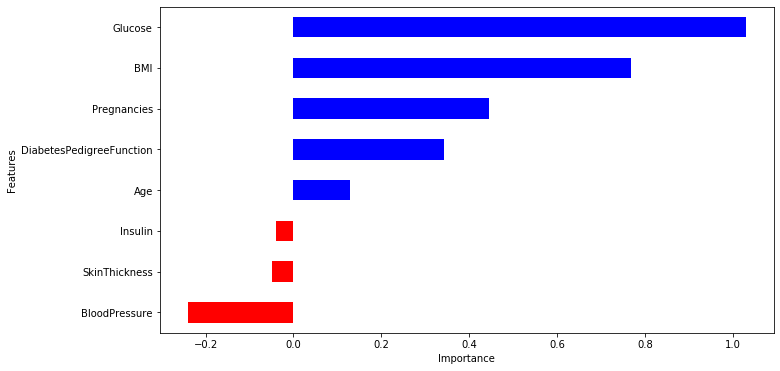

In [19]:
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

### From the above figure, we can draw the following conclusions.

- Glucose level, BMI, pregnancies and diabetes pedigree function have significant influence on the model, specially glucose level and BMI. It is good to see our machine learning model match what we have been hearing from doctors our entire lives!

- Blood pressure has a negative influence on the prediction, i.e. higher blood pressure is correlated with a person not being diabetic. (also, note that blood pressure is more important as a feature than age, because the magnitude is higher for blood pressure).

- Although age was more correlated than BMI to the output variables (as we saw during data exploration), the model relies more on BMI. This can happen for several reasons, including the fact that the correlation captured by age is also captured by some other variable, whereas the information captured by BMI is not captured by other variables.

Note that this above interpretations require that our input data is normalized. Without that, we can’t claim that importance is proportional to weights.

In [18]:
dfCheck.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1


In [ ]:
sampleData = dfCheck[:5]
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures

In [20]:
# predict Using the testData set

prediction = diabetesCheck.predict(testData)

print('prediction:', prediction)

prediction: [0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1]


## Measuring Model Performance

In [19]:
# Use score method to get accuracy of model
score = diabetesCheck.score(testData, testLabel)
print(score)

0.78


## Next steps

There are lots of ways to improve the above model. Here are some ideas.

- Input feature bucketing should help, i.e. create new variables for blood pressure in a particular range, glucose levels in a particular range, and so on.
- You could also improve the data cleaning, by replacing 0 values with the mean value.
- Read a bit about what metrics do doctors rely on the most to diagnose a diabetic patient, and create new features accordingly.